In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

# Taken from this link:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser?
#  lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3B80EjQpzNSOSuW3Pr0Yy4ZA%3D%3D

In [2]:
from IPython.display import Latex, SVG, Image
import string as st
import random as rd
import numpy as np
import re as re
import linecache as lc

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


plt.rc('text', usetex=True)



## 1 Partziala, Azterketa partziala: Termodinamika 

#### 2020ko  

  **Ostirala, urtarrilaren 25a** 


In [3]:
#                        0       1       2       3       4     5      6       7       8       9       10   11   12   13  
labels_azterketak = ['P1_A1','P1_A2','P1_A3','P1_A4','P1_A5','P1','P2_A1','P2_A2','P2_A3','P2_A4','P2_A5','P2','F1','F2']

label = labels_azterketak[5]

exam is the word to change to P&_A& depending on the P2_A4

In [4]:
# Obtain the couplings for correcting the first exercise in each quiz
# read the list of participants

file_handler_read = open('../ikasleak_2020_2021.csv', 'r')

ikasleak_dict = 'ikasleak_' + label

ikasleak_dict        = dict()
ikasleak_labels_full = []
ikasleak_labels_dni  = []
ikasleak_labels_az      = ['', '']
ikasleak_data        = []
total_lab            = ''

##########################################
###
#biko_kopurua = 14 ##################!!!!!!!!!!!!!!!!!!
#
#BLUE = '34m'
#def display_colored_text(color, text):
#    colored_text = f"\033[{color}{text}\033[00m"
#    return colored_text
#
#
###
#########################################

num = 0 # for printing reasons...see below
        # counter for generating a list of participants, to store the grades, for plotting reasons

# Structure of the file with the students list
# #          #  G NAN A1 A2 Nom conV P1_A1 P1_A2 P1_A3 P1_A4 P1_A5 P1 P2_A1 P2_A2 P2_A3 P2_A4 P2_A5 P2 F1 F2 email N_M
# words[]    0  1  2  3  4    5    6   7     8     9    10    11   12  13    14    15    16    17   18 19  20  21  22

labels_azterketak = ['P1_A1','P1_A2','P1_A3','P1_A4','P1_A5','P1','P2_A1','P2_A2','P2_A3','P2_A4','P2_A5','P2','F1','F2']

for i in range(7):
    next(file_handler_read) # skips the header line of the file

line_count =1
for line in file_handler_read:
    words = line.strip().split(';')
    
#    if line_count <= biko_kopurua: 
#        words[2] = display_colored_text(BLUE, words[2])
#    
    
    # Generate a data file to store information on the student
    #                     order          F, FI, I      NAN       A1        A2        Nom       conV      e-mail
    #  words[]            0-2char        0-2char       2         3         4         5         6         21
    ikasleak_data.append([words[0], words[1], words[2], words[3], words[4], words[5], words[6], words[-2].lower(), words[-1].lower()])
    
    #print(words[-2]+',')
    
    i = 2
    #for word in words[3:6]:
    #    words[i] = word.lower()
    #    i += 1
    key_label = '%s_%s_%s' % (words[3].lower(), words[4].lower(), words[5].lower())
    
    ikasleak_dict[str(key_label)] = words[2]
    # printing for editing reasons...
    #  generates a list, each element containing a student
    #  it is the "same" as participants_quiz_# except that it contains the complete lables for each student
    ikasleak_labels_full.append('_' + words[0] + \
                                      '_' + ikasleak_dict[str(key_label)] + \
                                      '_' + words[3].lower() + '_' + words[4].lower() + '_' + words[5].lower())
    
    # for the same token
    #  generate the labels for the plotting, extracting the NAN numbers an storing in the 
    ikasleak_labels_dni.append(words[2])
    
    ikasleak_labels_az[num] = ' = np.array([ \n\n'  + \
        '            #[P1_A1 P1_A2 P1_A3 P1_A4 P1_A5 P1   P2_A1 P2_A2 P2_A3 P2_A4 P2_A5 P2   F1  F2]\n'      + \
        '             [%s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,  %s ], \
    # 0, 1 \n' % (words[7],words[8],words[9],words[10],words[11],words[12],
                   words[13],words[14],words[15],words[16],words[17],words[18],words[19],words[20])
    
    for labels_az in labels_azterketak:
        ikasleak_labels_az[num] += '#%s   ****** \n' % labels_az + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa \n'  + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa \n'  + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa \n'  + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa \n'  
    ikasleak_labels_az[num] += '            ])\n\n'
    num += 1
    ikasleak_labels_az.append('')
    line_count += 1

ikasleak_zerrenda = ''
index = 0
for i in ikasleak_labels_full:
    ikasleak_zerrenda +=  i + ikasleak_labels_az[index] + '\n\n'
    index += 1

#print ikasleak_zerrenda

    # for generating the arrays of grades for the exercises of each student
ikasleak_notak = ' ikasleak_notak = np.array([\n\n'
for i in ikasleak_labels_full:
    ikasleak_notak += '          ' + i + ',\n'
ikasleak_notak += '\n])'

#print ikasleak_notak

n_bikoitzeko = 0
for i in ikasleak_data:
    print (i)
    
    if i[1] == 'FI':
        n_bikoitzeko += 1
        
#print(bikoitzeko)

bikoitzeko = [i[4:13] for i in ikasleak_labels_full[:n_bikoitzeko]]



['01', 'FIE', '73049129W', 'gomez', 'beldarrain', 'josu', '0', 'jgomez130@ikasle.ehu.eus', 'm']
['02', 'FIE', '79242232X', 'vivas', 'merino', 'jon', '0', 'jvivas001@ikasle.ehu.eus', 'm']
['03', 'IE', '73043397C', 'alcorta', 'lopetegui', 'manex', '0', 'malcorta014@ikasle.ehu.eus', 'm']
['04', 'IE', '16105298P', 'camiruaga', 'yanguas', 'iker', '0', 'icamiruaga007@ikasle.ehu.eus', 'm']
['05', 'IE', '58012653Y', 'ortizdemendibil', 'jausoro', 'asier', '0', 'aortizdemendib004@ikasle.ehu.eus', 'm']
['06', 'IE', '79125123V', 'sanz', 'zubizarreta', 'ibai', '0', 'isanz048@ikasle.ehu.eus', 'm']
['07', 'IE', '72607243S', 'uranga', 'granados', 'iker', '0', 'iuranga020@ikasle.ehu.eus', 'm']
['08', 'F', '73217117K', 'aizpuru', 'sulis', 'jon', '0', 'jaizpuru012@ikasle.ehu.eus', 'm']
['09', 'F', '20232393Y', 'aketxe', 'martinez', 'oier', '0', 'oaketxe001@ikasle.ehu.eus', 'm']
['10', 'F', '58030681W', 'anda', 'delika', 'unai', '0', 'uanda002@ikasle.ehu.eus', 'm']
['11', 'F', '73137892P', 'ballarena', 't

In [ ]:
for i in ikasleak_data:
    print (i[7])

In [5]:
text_aztxo_grades = ' = np.array([ \n\n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa \n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa \n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa \n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa \n'  + \
    '            [1]                                        # 0: not present, 1: present, 2: out \n' + \
'             ])\n\n'
for i in ikasleak_labels_full:
    print (i + text_aztxo_grades)


_01_73049129W_gomez_beldarrain_josu = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_02_79242232X_vivas_merino_jon = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_03_73043397C_alcorta_lopetegui_manex = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
       

In [6]:
_01_73049129W_gomez_beldarrain_josu = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_02_79242232X_vivas_merino_jon = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_03_73043397C_alcorta_lopetegui_manex = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_04_16105298P_camiruaga_yanguas_iker = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_05_58012653Y_ortizdemendibil_jausoro_asier = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_06_79125123V_sanz_zubizarreta_ibai = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_07_72607243S_uranga_granados_iker = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_08_73217117K_aizpuru_sulis_jon = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_09_20232393Y_aketxe_martinez_oier = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_10_58030681W_anda_delika_unai = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_11_73137892P_ballarena_tellechea_mikel = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_12_72856706C_benitez_malvar_alexander = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_13_73058273S_bergara_borrero_asier = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_14_45893980X_calvo_aurrekoetxea_olatz = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_15_49582252W_casares_michelena_jon = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_16_79187856Y_castresana_zorroza_antton = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_17_45175718S_costa_valencia_alex = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_18_72542668R_demiguel_salaberria_aitor = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_19_16098865S_dorado_cerrato_christian = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_20_72607102N_echeverria_ibarbia_aitor = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_21_78956052L_elizaran_mendarte_amaia = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_22_44157282L_epelde_martija_inigo = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_23_72526987Y_fernandez_sanchez_iker = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_24_72554877C_fernandez_tena_inaki = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_25_79131914T_folio_gallaga_yerai = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_26_73058179J_fuentetaja_leza_martin = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_27_73034131T_gajate_mendizabal_joritz = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_28_16093891D_garciadeiturrospe_lizaso_joane = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_29_72754135Y_garcia_guerrero_david = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_30_58032321D_garcia_ruiz_leire = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_31_79067337F_goirigolzarri_garcia_ander = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_32_72857240W_gonzalez_conde_ander = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_33_16103226Y_gonzalez_palacios_sue = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_34_72406207E_guerrero_calzas_iciar = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_35_72230455J_iniguez_garcia_eneko = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_36_72839779K_irazusta_mugica_manex = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_37_79048902H_jauregi_aberasturi_urtzi = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_38_49575024L_lacunza_castilla_inaki = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_39_73038874M_larranaga_jaio_aitor = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_40_20895415F_larrarte_mayoz_maite = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_41_72599873M_legorburu_newhouse_karla = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_42_16098019C_losada_dapena_inigo = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_43_72846790V_mongelos_martinez_asier = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_44_79172606M_muniozguren_arostegi_bittor = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_45_72605942W_nazabal_munoa_urtzi = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_46_45950606X_ortuzar_andres_asier = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_47_73508449N_parra_luri_daniel = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_48_71757668Z_redondo_prieto_aitor = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_49_45893212R_rodriguez_pena_daniel = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_50_72605063C_saez_murguiondo_oihane = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_51_16102559Y_salan_gutierrez_nahia = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_52_79176954Y_salcedo_mestraitua_garazi = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_53_79225571R_santamariaamurrio_fernandez_jon = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_54_45822937Z_soler_juan_jon = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_55_72516824D_untzilla_aseginolatza_uxue = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_56_79144173T_uriarte_amiano_unai = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_57_58013620F_uribeetxebarria_madinabeitia_jokin = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_58_72546793D_varela_etxeberria_ane = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_59_44349836V_zabala_alcorta_aiora = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_60_72526971J_zabala_balerdi_mikel = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


In [7]:
str_ = 'ikasleak_' + label + ' = np.array([\n\n'

ikasleak_ = ['            '+str(i)+',\n' for i in ikasleak_labels_full]

for participant in ikasleak_:
    str_ += participant
str_ = str_ + '\n\n])'    
print (str_)



ikasleak_P1 = np.array([

            _01_73049129W_gomez_beldarrain_josu,
            _02_79242232X_vivas_merino_jon,
            _03_73043397C_alcorta_lopetegui_manex,
            _04_16105298P_camiruaga_yanguas_iker,
            _05_58012653Y_ortizdemendibil_jausoro_asier,
            _06_79125123V_sanz_zubizarreta_ibai,
            _07_72607243S_uranga_granados_iker,
            _08_73217117K_aizpuru_sulis_jon,
            _09_20232393Y_aketxe_martinez_oier,
            _10_58030681W_anda_delika_unai,
            _11_73137892P_ballarena_tellechea_mikel,
            _12_72856706C_benitez_malvar_alexander,
            _13_73058273S_bergara_borrero_asier,
            _14_45893980X_calvo_aurrekoetxea_olatz,
            _15_49582252W_casares_michelena_jon,
            _16_79187856Y_castresana_zorroza_antton,
            _17_45175718S_costa_valencia_alex,
            _18_72542668R_demiguel_salaberria_aitor,
            _19_16098865S_dorado_cerrato_christian,
            _20_72607102N_ech

In [8]:
ikasleak_label = 'ikasleak_' + label

ikasleak_P1 = np.array([

            _01_73049129W_gomez_beldarrain_josu,
            _02_79242232X_vivas_merino_jon,
            _03_73043397C_alcorta_lopetegui_manex,
            _04_16105298P_camiruaga_yanguas_iker,
            _05_58012653Y_ortizdemendibil_jausoro_asier,
            _06_79125123V_sanz_zubizarreta_ibai,
            _07_72607243S_uranga_granados_iker,
            _08_73217117K_aizpuru_sulis_jon,
            _09_20232393Y_aketxe_martinez_oier,
            _10_58030681W_anda_delika_unai,
            _11_73137892P_ballarena_tellechea_mikel,
            _12_72856706C_benitez_malvar_alexander,
            _13_73058273S_bergara_borrero_asier,
            _14_45893980X_calvo_aurrekoetxea_olatz,
            _15_49582252W_casares_michelena_jon,
            _16_79187856Y_castresana_zorroza_antton,
            _17_45175718S_costa_valencia_alex,
            _18_72542668R_demiguel_salaberria_aitor,
            _19_16098865S_dorado_cerrato_christian,
            _20_72607102N_echeverria_ibarbia_aitor,
            _21_78956052L_elizaran_mendarte_amaia,
            _22_44157282L_epelde_martija_inigo,
            _23_72526987Y_fernandez_sanchez_iker,
            _24_72554877C_fernandez_tena_inaki,
            _25_79131914T_folio_gallaga_yerai,
            _26_73058179J_fuentetaja_leza_martin,
            _27_73034131T_gajate_mendizabal_joritz,
            _28_16093891D_garciadeiturrospe_lizaso_joane,
            _29_72754135Y_garcia_guerrero_david,
            _30_58032321D_garcia_ruiz_leire,
            _31_79067337F_goirigolzarri_garcia_ander,
            _32_72857240W_gonzalez_conde_ander,
            _33_16103226Y_gonzalez_palacios_sue,
            _34_72406207E_guerrero_calzas_iciar,
            _35_72230455J_iniguez_garcia_eneko,
            _36_72839779K_irazusta_mugica_manex,
            _37_79048902H_jauregi_aberasturi_urtzi,
            _38_49575024L_lacunza_castilla_inaki,
            _39_73038874M_larranaga_jaio_aitor,
            _40_20895415F_larrarte_mayoz_maite,
            _41_72599873M_legorburu_newhouse_karla,
            _42_16098019C_losada_dapena_inigo,
            _43_72846790V_mongelos_martinez_asier,
            _44_79172606M_muniozguren_arostegi_bittor,
            _45_72605942W_nazabal_munoa_urtzi,
            _46_45950606X_ortuzar_andres_asier,
            _47_73508449N_parra_luri_daniel,
            _48_71757668Z_redondo_prieto_aitor,
            _49_45893212R_rodriguez_pena_daniel,
            _50_72605063C_saez_murguiondo_oihane,
            _51_16102559Y_salan_gutierrez_nahia,
            _52_79176954Y_salcedo_mestraitua_garazi,
            _53_79225571R_santamariaamurrio_fernandez_jon,
            _54_45822937Z_soler_juan_jon,
            _55_72516824D_untzilla_aseginolatza_uxue,
            _56_79144173T_uriarte_amiano_unai,
            _57_58013620F_uribeetxebarria_madinabeitia_jokin,
            _58_72546793D_varela_etxeberria_ane,
            _59_44349836V_zabala_alcorta_aiora,
            _60_72526971J_zabala_balerdi_mikel,

])

In [9]:
ikasleak_counter = range(1, len(ikasleak_data)+1)

ikasleak_labels = [i for i in ikasleak_labels_dni]

label_ari_1 = label + '_ari_1' 
label_ari_2 = label + '_ari_2' 
label_ari_3 = label + '_ari_3' 
label_ari_4 = label + '_ari_4'
label_ari_dena      = label + '_ari_dena'
label_notak         = label + '_notak'

label_ari_1 = [sum(i[0][:]) for i in ikasleak_P1]
label_ari_2 = [sum(i[1][:]) for i in ikasleak_P1] 
label_ari_3 = [sum(i[2][:]) for i in ikasleak_P1] 
label_ari_4 = [sum(i[3][:]) for i in ikasleak_P1]

label_ari_dena      = [0 for i in ikasleak_P1]
label_notak         = np.zeros((len(ikasleak_P1), 3))

for i in ikasleak_counter:
    
    label_ari_dena[i-1] = label_ari_1[i-1] + label_ari_2[i-1] + label_ari_3[i-1] + label_ari_4[i-1]

    if label_ari_dena[i-1] >= 5.0:
        label_notak[i-1][0], label_notak[i-1][1], label_notak[i-1][2] = i, label_ari_dena[i-1], 1
    else:
        label_notak[i-1][0], label_notak[i-1][1], label_notak[i-1][2] = i, label_ari_dena[i-1], 0
        
        


In [10]:
cont = 0
for i,j,k,l in zip(label_ari_1,label_ari_2,label_ari_3,label_ari_4):
    print (cont+1, i, j, k, l,)
    cont += 1

1 0.5 0.5 0.5 0.5
2 0.5 0.5 0.5 0.5
3 0.5 0.5 0.5 0.5
4 0.5 0.5 0.5 0.5
5 0.5 0.5 0.5 0.5
6 0.5 0.5 0.5 0.5
7 0.5 0.5 0.5 0.5
8 0.5 0.5 0.5 0.5
9 0.5 0.5 0.5 0.5
10 0.5 0.5 0.5 0.5
11 0.5 0.5 0.5 0.5
12 0.5 0.5 0.5 0.5
13 0.5 0.5 0.5 0.5
14 0.5 0.5 0.5 0.5
15 0.5 0.5 0.5 0.5
16 0.5 0.5 0.5 0.5
17 0.5 0.5 0.5 0.5
18 0.5 0.5 0.5 0.5
19 0.5 0.5 0.5 0.5
20 0.5 0.5 0.5 0.5
21 0.5 0.5 0.5 0.5
22 0.5 0.5 0.5 0.5
23 0.5 0.5 0.5 0.5
24 0.5 0.5 0.5 0.5
25 0.5 0.5 0.5 0.5
26 0.5 0.5 0.5 0.5
27 0.5 0.5 0.5 0.5
28 0.5 0.5 0.5 0.5
29 0.5 0.5 0.5 0.5
30 0.5 0.5 0.5 0.5
31 0.5 0.5 0.5 0.5
32 0.5 0.5 0.5 0.5
33 0.5 0.5 0.5 0.5
34 0.5 0.5 0.5 0.5
35 0.5 0.5 0.5 0.5
36 0.5 0.5 0.5 0.5
37 0.5 0.5 0.5 0.5
38 0.5 0.5 0.5 0.5
39 0.5 0.5 0.5 0.5
40 0.5 0.5 0.5 0.5
41 0.5 0.5 0.5 0.5
42 0.5 0.5 0.5 0.5
43 0.5 0.5 0.5 0.5
44 0.5 0.5 0.5 0.5
45 0.5 0.5 0.5 0.5
46 0.5 0.5 0.5 0.5
47 0.5 0.5 0.5 0.5
48 0.5 0.5 0.5 0.5
49 0.5 0.5 0.5 0.5
50 0.5 0.5 0.5 0.5
51 0.5 0.5 0.5 0.5
52 0.5 0.5 0.5 0.5
53 0.5 0.5 0.5 0.5
54

In [11]:
params1 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.2
            }
params2 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.4
            }
params3 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.6
            }
params4 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.8
            }
paramsParDena = {
          'lw' : 5,
          'ms' : 10,
          'mfc' : 'Skyblue',
          'mec':'k',
          'mew': 2,
          'color' : 'Skyblue',
          'alpha' : 0.3
            }


<ipython-input-12-59a1eb89e82e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(ikasleak_labels, rotation='vertical', size=20)
<ipython-input-12-59a1eb89e82e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels([j+' '+i[3] for i,j in zip(ikasleak_data[:],ikasleak_labels)], rotation='vertical', size=10)
<ipython-input-12-59a1eb89e82e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ikasleak_labels, rotation='vertical', size=20)


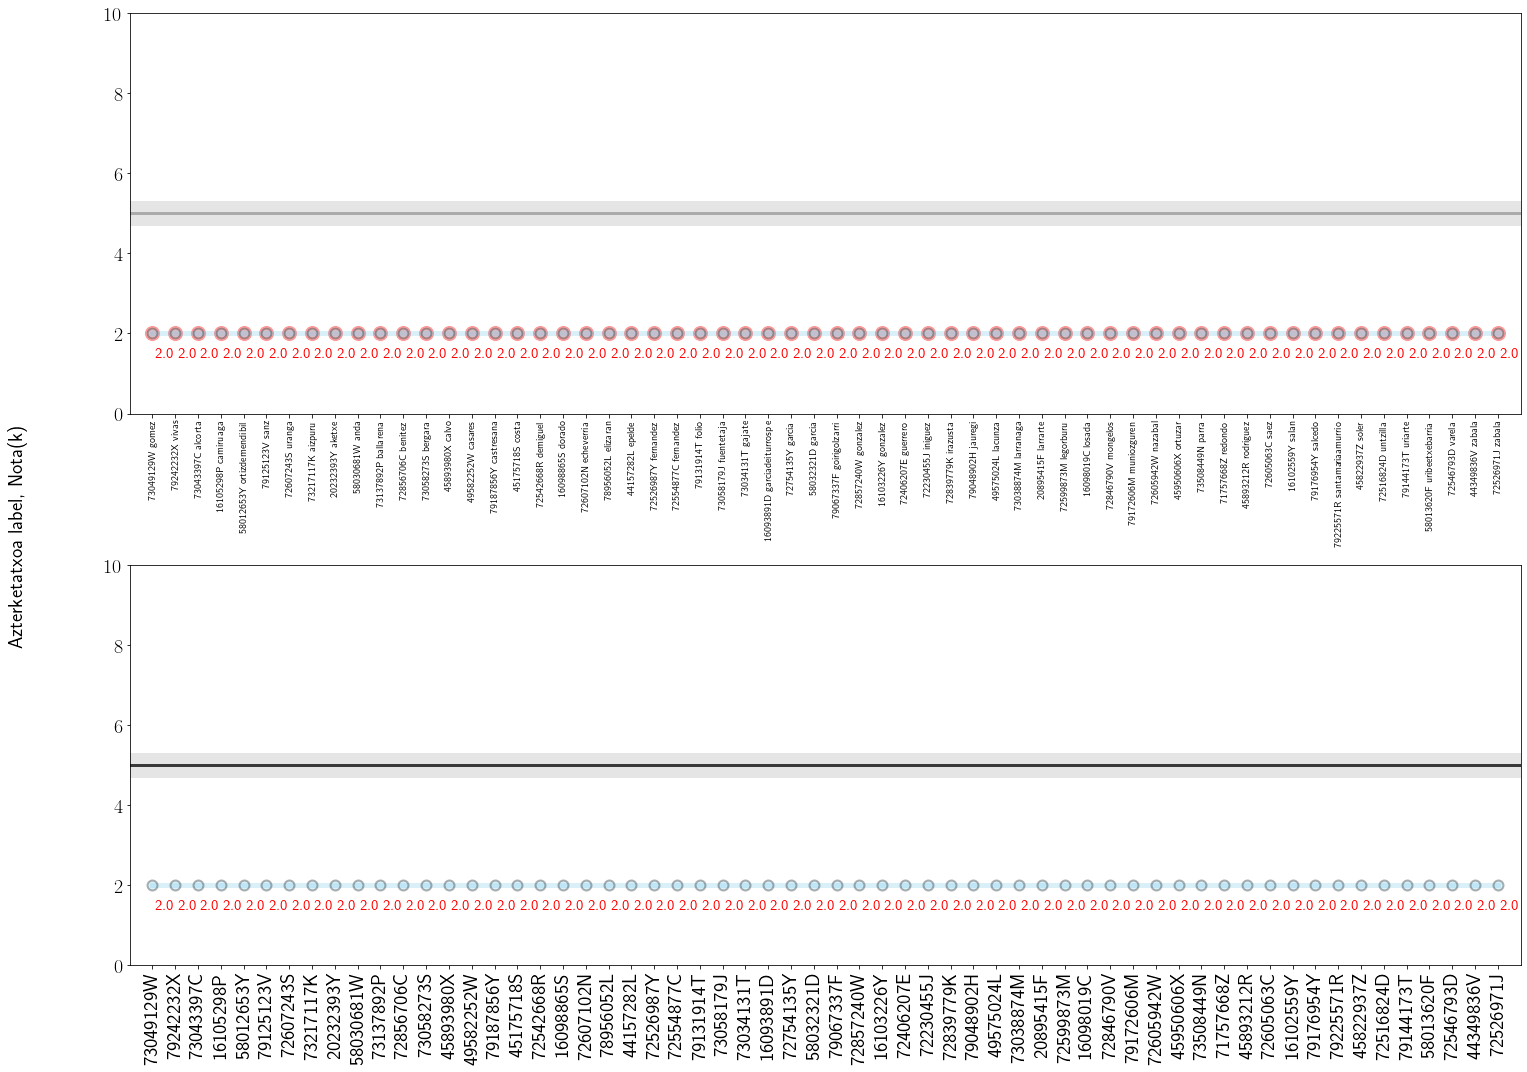

In [12]:
fig_notak_Azterketatxolabel, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15), )
ax0, ax1 = axes.flat

#fig_notak_AzterketatxoaIII.text(0.5, 0.08,  r'$Ikasleak$', size=20 , ha='center')
fig_notak_Azterketatxolabel.text(-0.06, 0.5, r'Azterketatxoa label, Nota(k)', size=20, va='center', rotation='vertical')

ax0.tick_params(axis='y', labelsize=20)

ax0.set_xlim(0.0, max(ikasleak_counter)+1)
ax0.set_ylim(0.0 ,10.0) 
# x_ticklabels with DNI
ax0.set_xticklabels(ikasleak_labels, rotation='vertical', size=20)
# x_ticklabels with names
ax0.set_xticklabels([j+' '+i[3] for i,j in zip(ikasleak_data[:],ikasleak_labels)], rotation='vertical', size=10)
ax0.xaxis.set_ticks(ikasleak_counter)

ax1.tick_params(axis='y', labelsize=20)

ax1.set_xlim(0.0, max(ikasleak_counter)+1)
ax1.set_ylim(0.0, 10.0) 
ax1.set_xticklabels(ikasleak_labels, rotation='vertical', size=20)
#ax1.set_xticklabels([i[3] for i in ikasleak_data[:]], rotation='vertical', size=10)
ax1.xaxis.set_ticks(ikasleak_counter)

#ax0.grid(True)

#ax0.legend(prop={'size': 8})

ax0.plot(ikasleak_counter, label_ari_dena, '-o', **paramsParDena)
ax1.plot(ikasleak_counter, label_ari_dena, '-o', **paramsParDena)

ax0.axhline(y=5.00, xmin=0.00, xmax=1.00, linewidth=3, color = 'k', alpha=0.25)
ax1.axhline(y=5.00, xmin=0.00, xmax=1.00, linewidth=3, color = 'k', alpha=0.75)
ax0.axhline(y=5.00, xmin=0.00, xmax=1.00, linewidth=25, color = 'k', alpha=0.10)
ax1.axhline(y=5.00, xmin=0.00, xmax=1.00, linewidth=25, color = 'k', alpha=0.10)

for i in ikasleak_counter:
    if ikasleak_P1[i-1][4][0] == 1:
        if label_notak[i-1,1] >= 5.0:
            ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='g', alpha=0.7)
            ax0.plot([label_notak[i-1][0]], [label_notak[i-1][0]], color ='blue',  linewidth=1.5, linestyle="--")
            ax1.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='g', alpha=0.7)
            ax1.plot([label_notak[i-1][0]], [label_notak[i-1][0]], color ='blue',  linewidth=1.5, linestyle="--")
        else:
            ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='r', alpha=0.3)
    elif ikasleak_P1[i-1][4][0] == 0:
        ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='k', alpha=1.0)
        ax1.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='k', alpha=1.0)
    else:
        ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='b', alpha=1.0)
        ax1.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='b', alpha=1.0)

for i in ikasleak_counter:
    if label_notak[i-1,1] != 0.0:
        if label_notak[i-1,1] >= 5.0:
            ax0.annotate('%s' % label_notak[i-1,1], xy=(label_notak[i-1,0], label_notak[i-1,1]), 
                 xytext=(label_notak[i-1,0]+0.1, label_notak[i-1,1]-0.6), size=15, color='k')
            ax1.annotate('%s' % label_notak[i-1,1], xy=(label_notak[i-1,0], label_notak[i-1,1]), 
                 xytext=(label_notak[i-1,0]+0.1, label_notak[i-1,1]-0.6), size=15, color='k')
        else:
            ax0.annotate('%s' % label_notak[i-1,1], xy=(label_notak[i-1,0], label_notak[i-1,1]), 
                 xytext=(label_notak[i-1,0]+0.1, label_notak[i-1,1]-0.6), size=15, color='r')
            ax1.annotate('%s' % label_notak[i-1,1], xy=(label_notak[i-1,0], label_notak[i-1,1]), 
                 xytext=(label_notak[i-1,0]+0.1, label_notak[i-1,1]-0.6), size=15, color='r')

plt.tight_layout()
#plt.savefig('Notak_'+label+'_2018_01_26.pdf')


In [13]:
j = 0
for i in label_ari_dena:
    print ("{:2d}".format(j+1), ikasleak_labels[j], "{:5.2f}".format(i))
    j += 1
    


 1 73049129W  2.00
 2 79242232X  2.00
 3 73043397C  2.00
 4 16105298P  2.00
 5 58012653Y  2.00
 6 79125123V  2.00
 7 72607243S  2.00
 8 73217117K  2.00
 9 20232393Y  2.00
10 58030681W  2.00
11 73137892P  2.00
12 72856706C  2.00
13 73058273S  2.00
14 45893980X  2.00
15 49582252W  2.00
16 79187856Y  2.00
17 45175718S  2.00
18 72542668R  2.00
19 16098865S  2.00
20 72607102N  2.00
21 78956052L  2.00
22 44157282L  2.00
23 72526987Y  2.00
24 72554877C  2.00
25 79131914T  2.00
26 73058179J  2.00
27 73034131T  2.00
28 16093891D  2.00
29 72754135Y  2.00
30 58032321D  2.00
31 79067337F  2.00
32 72857240W  2.00
33 16103226Y  2.00
34 72406207E  2.00
35 72230455J  2.00
36 72839779K  2.00
37 79048902H  2.00
38 49575024L  2.00
39 73038874M  2.00
40 20895415F  2.00
41 72599873M  2.00
42 16098019C  2.00
43 72846790V  2.00
44 79172606M  2.00
45 72605942W  2.00
46 45950606X  2.00
47 73508449N  2.00
48 71757668Z  2.00
49 45893212R  2.00
50 72605063C  2.00
51 16102559Y  2.00
52 79176954Y  2.00
53 79225571R

In [14]:
j = 0
for i in label_ari_dena:
    print ("{:2d}".format(j+1), "{:5.2f}".format(i), ikasleak_labels_full[j] )
    j += 1
    


 1  2.00 _01_73049129W_gomez_beldarrain_josu
 2  2.00 _02_79242232X_vivas_merino_jon
 3  2.00 _03_73043397C_alcorta_lopetegui_manex
 4  2.00 _04_16105298P_camiruaga_yanguas_iker
 5  2.00 _05_58012653Y_ortizdemendibil_jausoro_asier
 6  2.00 _06_79125123V_sanz_zubizarreta_ibai
 7  2.00 _07_72607243S_uranga_granados_iker
 8  2.00 _08_73217117K_aizpuru_sulis_jon
 9  2.00 _09_20232393Y_aketxe_martinez_oier
10  2.00 _10_58030681W_anda_delika_unai
11  2.00 _11_73137892P_ballarena_tellechea_mikel
12  2.00 _12_72856706C_benitez_malvar_alexander
13  2.00 _13_73058273S_bergara_borrero_asier
14  2.00 _14_45893980X_calvo_aurrekoetxea_olatz
15  2.00 _15_49582252W_casares_michelena_jon
16  2.00 _16_79187856Y_castresana_zorroza_antton
17  2.00 _17_45175718S_costa_valencia_alex
18  2.00 _18_72542668R_demiguel_salaberria_aitor
19  2.00 _19_16098865S_dorado_cerrato_christian
20  2.00 _20_72607102N_echeverria_ibarbia_aitor
21  2.00 _21_78956052L_elizaran_mendarte_amaia
22  2.00 _22_44157282L_epelde_martij

In [15]:
file_handler_write = open(label + '_notak.txt', 'w')

not_present_counter = 0
for i in ikasleak_counter:
    if ikasleak_P1[i-1][4][0] == 1:
        file_handler_write.write("{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 "{:5.2f}".format(label_notak[i-1][1])+',  \n')
        if label_notak[i-1][1] >= 5.0:
            print ("{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 "{:5.2f}".format(label_notak[i-1][1]))
        else:
            print ("{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 '\x1b[1;41m' + \
                                  "{:5.2f}".format(label_notak[i-1][1]) +\
                                  '\x1b[0m')
    elif ikasleak_P1[i-1][4][0] == 0:
        file_handler_write.write("{:2d}".format(i) + '  ' + ikasleak_labels[i-1] + '  ' + "{:5.2f}".format(0.0) + ',  \n')
#        print "{:2d}".format(i) + '  ' + \
#                                 '\x1b[1;35m'+str(ikasleak_labels[i-1]) + '  ' + "%s" %'_____'+'\x1b[0m'
        print ("{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 '\x1b[1;41m' + \
                                  "{:5.2f}".format(0.0) +\
                                  '\x1b[0m')


                                 
        not_present_counter += 1
        
    else:
        file_handler_write.write("{:2d}".format(i) + '  ' + ikasleak_labels[i-1] + '  ' + "{:5.2f}".format(20.0) + ',  \n')
#        print "{:2d}".format(i) + '  ' + \
#                                 '\033[36m'+str(ikasleak_labels[i-1]) + '  ' + "%s" %'_____'+'\033[0m'
        print ("{:2d}".format(i) + \
                                 '  ' '\033[36m' + ikasleak_labels[i-1] + '  ' + \
                                 '\033[36m' + \
                                  "{:5.2f}".format(20.0) +\
                                  '\033[0m')
                                 
        not_present_counter += 1
        
        
file_handler_write.write('\n'*2)
file_handler_write.write(' '*10 + 'Ez dira %s ikasle etorri' % str(not_present_counter) + '\n'*2)
file_handler_write.write(' '*10 + 'Batez besteko nota da: %s' \
                         % str( round(sum([i[1] for i in label_notak ]) \
                                / (len(ikasleak_counter) - not_present_counter), 2) ) \
                         + '\n'*2)

file_handler_write.close()

print ('\n'*2)
print (' '*10 + 'Ez dira %s ikasle etorri' % str(not_present_counter) + '\n'*2)
print (' '*10 + 'Batez besteko nota da: %s' \
                         % str( round(sum([i[1] for i in label_notak ]) \
                                / (len(ikasleak_counter) - not_present_counter), 2) ) \
                         + '\n'*2)


 1  73049129W   2.00
 2  79242232X   2.00
 3  73043397C   2.00
 4  16105298P   2.00
 5  58012653Y   2.00
 6  79125123V   2.00
 7  72607243S   2.00
 8  73217117K   2.00
 9  20232393Y   2.00
10  58030681W   2.00
11  73137892P   2.00
12  72856706C   2.00
13  73058273S   2.00
14  45893980X   2.00
15  49582252W   2.00
16  79187856Y   2.00
17  45175718S   2.00
18  72542668R   2.00
19  16098865S   2.00
20  72607102N   2.00
21  78956052L   2.00
22  44157282L   2.00
23  72526987Y   2.00
24  72554877C   2.00
25  79131914T   2.00
26  73058179J   2.00
27  73034131T   2.00
28  16093891D   2.00
29  72754135Y   2.00
30  58032321D   2.00
31  79067337F   2.00
32  72857240W   2.00
33  16103226Y   2.00
34  72406207E   2.00
35  72230455J   2.00
36  72839779K   2.00
37  79048902H   2.00
38  49575024L   2.00
39  73038874M   2.00
40  20895415F   2.00
41  72599873M   2.00
42  16098019C   2.00
43  72846790V   2.00
44  79172606M   2.00
45  72605942W   2.00
46  45950606X   2.00
47  73508449N   2.00
48  71757668Z

In [16]:
from collections import Counter

class_2020_2021_label = 'class_2020_2021_' + label 
sorted_notak_label    = 'sorted_notak_' + label
notak_label_banaketa  = 'notak_' + label + '_banaketa'

class_2020_2021_label = {}

for i, j, k, l in zip(label_notak, ikasleak_labels, ikasleak_P1, ikasleak_data):
    #print(l[-1], l[-3])
    
    class_2020_2021_label[j+'_'+str(k[4][0])] = "{:5.2f}".format(i[1])

sorted_notak_label = np.array(sorted(class_2020_2021_label.items(), key=lambda x: (x[1], x[0][-1]), reverse=True))

notak_label_banaketa = sorted([[k,v]  for [k, v] in \
        Counter(sorted([float(i[1]) for i in sorted_notak_label], reverse=True)).items()], reverse=True)

class_2020_2021_label

{'73049129W_1': ' 2.00',
 '79242232X_1': ' 2.00',
 '73043397C_1': ' 2.00',
 '16105298P_1': ' 2.00',
 '58012653Y_1': ' 2.00',
 '79125123V_1': ' 2.00',
 '72607243S_1': ' 2.00',
 '73217117K_1': ' 2.00',
 '20232393Y_1': ' 2.00',
 '58030681W_1': ' 2.00',
 '73137892P_1': ' 2.00',
 '72856706C_1': ' 2.00',
 '73058273S_1': ' 2.00',
 '45893980X_1': ' 2.00',
 '49582252W_1': ' 2.00',
 '79187856Y_1': ' 2.00',
 '45175718S_1': ' 2.00',
 '72542668R_1': ' 2.00',
 '16098865S_1': ' 2.00',
 '72607102N_1': ' 2.00',
 '78956052L_1': ' 2.00',
 '44157282L_1': ' 2.00',
 '72526987Y_1': ' 2.00',
 '72554877C_1': ' 2.00',
 '79131914T_1': ' 2.00',
 '73058179J_1': ' 2.00',
 '73034131T_1': ' 2.00',
 '16093891D_1': ' 2.00',
 '72754135Y_1': ' 2.00',
 '58032321D_1': ' 2.00',
 '79067337F_1': ' 2.00',
 '72857240W_1': ' 2.00',
 '16103226Y_1': ' 2.00',
 '72406207E_1': ' 2.00',
 '72230455J_1': ' 2.00',
 '72839779K_1': ' 2.00',
 '79048902H_1': ' 2.00',
 '49575024L_1': ' 2.00',
 '73038874M_1': ' 2.00',
 '20895415F_1': ' 2.00',


In [ ]:
#ikasleak_data

In [ ]:
#ikasleak_labels_full

In [17]:

print (len([1 for i in class_2020_2021_label.keys() if float(i[-1]) == 1.0]))

60


In [18]:
i_gaindituak, i_ezgaindituak, i_ezaurkeztuak = 0,0,0
for i in notak_label_banaketa:
    if i[0] >= 5.0:
        i_gaindituak = i_gaindituak + i[1]
    if 5.0 > i[0] > 0.0:
        i_ezgaindituak = i_ezgaindituak + i[1]
    else:
        i_ezaurkeztuak = i[1]
print (i_gaindituak, i_ezgaindituak, i_ezaurkeztuak)
print (i_gaindituak + i_ezgaindituak + i_ezaurkeztuak)

print("{:5.2f}".format(100*(i_gaindituak/(i_gaindituak+i_ezgaindituak))))
print("{:5.2f}".format(100*(i_gaindituak/(i_gaindituak+i_ezgaindituak+i_ezaurkeztuak))))


print('\n\n\n')


i_sasi_gaindituak, i_sasi_ezgaindituak, i_sasi_ezaurkeztuak = 0,0,0
for i in notak_label_banaketa:
    if i[0] >= 4.75:
        i_sasi_gaindituak = i_sasi_gaindituak + i[1]
    if 4.75 > i[0] > 0.0:
        i_sasi_ezgaindituak = i_sasi_ezgaindituak + i[1]
    else:
        i_sasi_ezaurkeztuak = i[1]
print (i_sasi_gaindituak, i_sasi_ezgaindituak, i_sasi_ezaurkeztuak)
print (i_sasi_gaindituak + i_sasi_ezgaindituak + i_sasi_ezaurkeztuak)

print("{:5.2f}".format(100*(i_sasi_gaindituak/(i_sasi_gaindituak+i_sasi_ezgaindituak))))
print("{:5.2f}".format(100*(i_sasi_gaindituak/(i_sasi_gaindituak+i_sasi_ezgaindituak+i_sasi_ezaurkeztuak))))

0 60 0
60
 0.00
 0.00




0 60 0
60
 0.00
 0.00


In [19]:
nanak = [i[0][0:9] for  i in sorted_notak_label]

<ipython-input-20-d2f073be94c6>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(xticklabels, rotation='vertical', size=20)


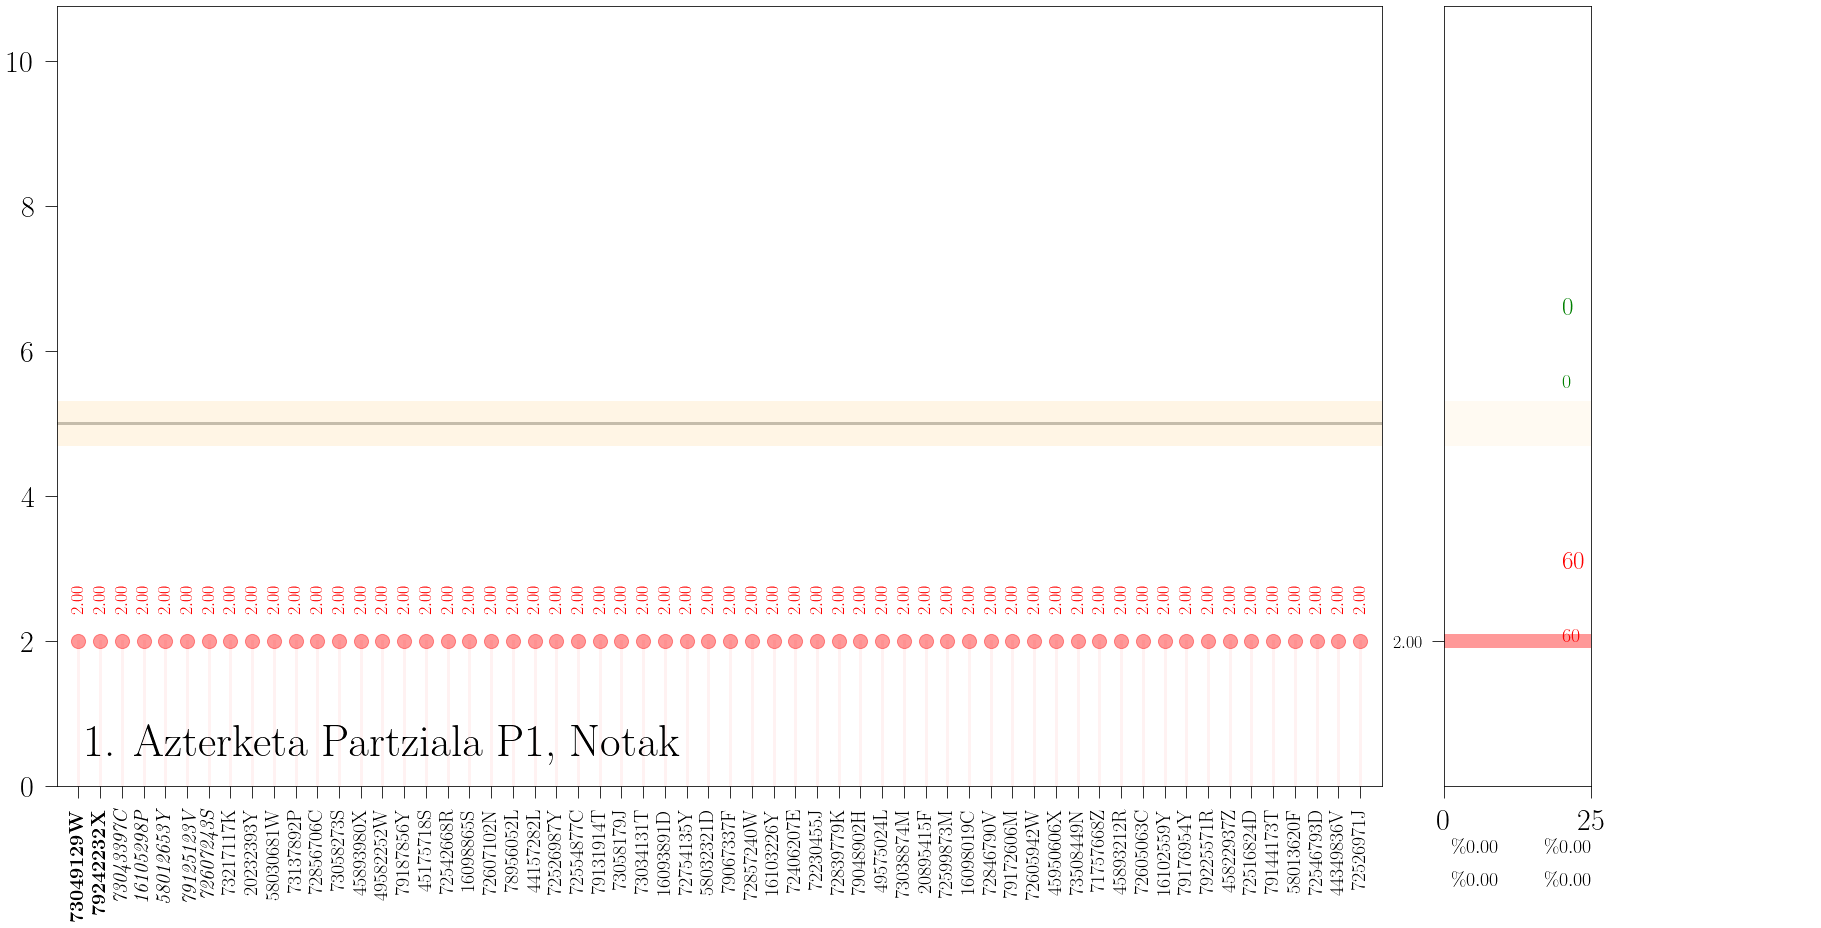

In [20]:
from matplotlib import gridspec

fig_notak_Azterketatxolabel_ordered = 'fig_notak_1_Partzial' + label + '_ordered'

fig_notak_Azterketatxolabel_ordered = plt.figure(figsize=(25,13), );
gs = gridspec.GridSpec(1, 2, width_ratios=[9, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

fig_notak_Azterketatxolabel_ordered.text(0.05, 0.20, r'\textrm{1. Azterketa Partziala }' + r'\textrm{%s}' % label + r'\textrm{, Notak}', size=45, va='center')

ax0.tick_params(axis='y', labelsize=20)

for i in [ax0, ax1]:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12)

bikoitza = ['73049129W', '79242232X']
ingeniaritza = ['73043397C', '16105298P', '58012653Y', '79125123V', '72607243S']

    
ax0.set_xlim(0.0, max(ikasleak_counter)+1)
ax0.set_ylim(0.0 ,10.75) 

xticklabels = []

for k in sorted_notak_label[:,0]:
    if k[:][0:9] in bikoitza: 
        xticklabels.append(r'\textbf{\textrm{%s}}' % k[:][0:9])
    elif k[:][0:9] in ingeniaritza:
        xticklabels.append(r'\textit{\textrm{%s}}' % k[:][0:9])
    else:
        xticklabels.append(r'\textrm{\textrm{%s}}' % k[:][0:9])

ax0.set_xticklabels(xticklabels, rotation='vertical', size=20)
        
ax0.xaxis.set_ticks(ikasleak_counter)

ax1.set_xlim(0.0, 25.0)
ax1.set_ylim(0.0, 10.75)
ax1.yaxis.set_ticks([i[0] for i in notak_label_banaketa])
ax1.set_yticklabels([r'$%s$' %  "{:5.2f}".format(i[0]) for i in notak_label_banaketa], size=18)

colors_bar = ['g' if i[0] >= 5.0 else 'r' if i[0] > 0.0 else 'k' for i in notak_label_banaketa ]

ax1.barh([i[0] for i in notak_label_banaketa], [i[1] for i in notak_label_banaketa],
           0.2, align='center', alpha=0.4, color = colors_bar)

for i in notak_label_banaketa:
    if i[0] > 0.0:
        ax1.annotate(r'$%s$' % i[1], xy=(i[1], i[0]), xytext=(i[1]+0.4, i[0]-0.05), size=15, color='k')
    else:
        ax1.annotate(r'$%s$' % i[1], xy=(i[1], i[0]), xytext=(i[1]+0.4, i[0]+0.05), size=15, color='k', alpha=0.8)

fak=1.0/10.75

for i in ikasleak_counter:
    if float(sorted_notak_label[:][i-1][0][-1]) == 1:
        if float(sorted_notak_label[i-1,1]) >= 5.0:
            ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='g', alpha=0.5)            
            ax0.axvline(x=label_notak[i-1,0], ymin=0.00, ymax=float(sorted_notak_label[i-1,1])*fak, linewidth=3, color='g', alpha=0.05)
                        
            if nanak[i-1] in bikoitzeko:
                ax0.scatter(label_notak[i-1,0], 0.0, marker='s', s=100, color='k', alpha=0.5)
            
        else:
            ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='r', alpha=0.4)
            ax0.axvline(x=label_notak[i-1,0], ymin=0.00, ymax=float(sorted_notak_label[i-1,1])*fak, linewidth=3, color='r', alpha=0.05)
            
            if nanak[i-1] in bikoitzeko:
                ax0.scatter(label_notak[i-1,0], 0.0, marker='s', s=100, color='k', alpha=0.5)
            
    elif float(sorted_notak_label[:][i-1][0][-1]) == 0:
        ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='k', alpha=1.0)
        
    else:
        ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='b', alpha=1.0)

ax0.axhline(y=5.0, xmin=0.00, xmax=1.00, linewidth=3, color = 'k', alpha=0.25)
ax0.axhline(y=5.0, xmin=0.00, xmax=1.00, linewidth=45, color = 'orange', alpha=0.10)
ax1.axhline(y=5.0, xmin=0.00, xmax=25.00, linewidth=45, color = 'orange', alpha=0.05)


        
#ax0.scatter(label_notak[-8,0], 10.00, marker='s', s=100, color='k', alpha=0.5)
#ax0.scatter(label_notak[-8,0],  9.50, marker='s', s=100, color='orange', alpha=0.5)
#ax0.scatter(label_notak[-8,0],  9.00, marker='*', s=100, color='magenta', alpha=0.8)

#ax0.annotate(r'$\textrm{Bikoitzekoa}$' , xy=(label_notak[-7,0], 10.00), xytext=(label_notak[-6,0]-0.5, 10.00-0.05), size=18, color='k',)
#ax0.annotate(r'$\textrm{Deialdia} \ge 1$' , xy=(label_notak[-7,0],  9.50), xytext=(label_notak[-6,0]-0.5,  9.50-0.05), size=18, color='k',)
#ax0.annotate(r'$\textrm{Emakumezko}$' , xy=(label_notak[-7,0],  9.00), xytext=(label_notak[-6,0]-0.5,  9.00-0.05), size=18, color='k',)


#r'$\textrm{Bikoitzekoa}$' , xy=(label_notak[-4,0], 10.00), xytext=(label_notak[-4,0], 10.00), size=18, color='k',

for i in ikasleak_counter:
    if float(sorted_notak_label[i-1,1]) != 0.0:
        if float(sorted_notak_label[i-1,1]) == 10.0:
            ax0.annotate(r'$%s$' % sorted_notak_label[i-1,1], xy=(label_notak[i-1,0], float(sorted_notak_label[i-1,1])), 
                 xytext=(label_notak[i-1,0]-0.35, float(sorted_notak_label[i-1,1])+0.55), 
                         size=18, color='k', rotation='vertical')
        elif float(sorted_notak_label[i-1,1]) >= 5.0:
            ax0.annotate(r'$%s$' % sorted_notak_label[i-1,1], xy=(label_notak[i-1,0], float(sorted_notak_label[i-1,1])), 
                 xytext=(label_notak[i-1,0]-0.35, float(sorted_notak_label[i-1,1])+0.42), 
                         size=18, color='k', rotation='vertical')            
        elif float(sorted_notak_label[i-1,1]) > 0.0:
            ax0.annotate(r'$%s$' % sorted_notak_label[i-1,1], xy=(label_notak[i-1,0], float(sorted_notak_label[i-1,1])), 
                 xytext=(label_notak[i-1,0]-0.35, float(sorted_notak_label[i-1,1])+0.42), 
                         size=18, color='r', rotation='vertical')

ax1.annotate(r'$%s$' % str(i_gaindituak),   xy=(20,5), xytext=(20,6.5), size=25, color='g', rotation='horizontal')
ax1.annotate(r'$%s$' % str(i_ezgaindituak), xy=(20,2), xytext=(20,3), size=25, color='r', rotation='horizontal')
ax1.text(1.15, -0.85, r'$%s$' % str('\%'+"{:5.2f}".format(100*(i_gaindituak/(i_gaindituak+i_ezgaindituak)))), size=20, va='center', rotation='horizontal');
ax1.text(17.0, -0.85, r'$%s$' % str('\%'+"{:5.2f}".format(100*(i_gaindituak/(i_gaindituak+i_ezgaindituak+i_ezaurkeztuak)))), size=20, va='center', rotation='horizontal');

ax1.annotate(r'$%s$' % str(i_sasi_gaindituak),   xy=(20,5), xytext=(20,5.5), size=20, color='g', rotation='horizontal')
ax1.annotate(r'$%s$' % str(i_sasi_ezgaindituak), xy=(20,2), xytext=(20,2), size=20, color='r', rotation='horizontal')
ax1.text(1.15, -1.30, r'$%s$' % str('\%'+"{:5.2f}".format(100*(i_sasi_gaindituak/(i_sasi_gaindituak+i_sasi_ezgaindituak)))), size=20, va='center', rotation='horizontal');
ax1.text(17.0, -1.30, r'$%s$' % str('\%'+"{:5.2f}".format(100*(i_sasi_gaindituak/(i_sasi_gaindituak+i_sasi_ezgaindituak+i_sasi_ezaurkeztuak)))), size=20, va='center', rotation='horizontal');


plt.tight_layout()

plt.savefig('Notak_' + label + '_st.pdf')

